## I. Introduction

In this coursework, we will be using the California housing dataset to develop a machine learning model for the purpose of housing market analysis and prediction. Our dataset contains information on various features such as longitude, latitude, housing_median_age,	total_rooms,	total_bedrooms,	population,	households,	median_income,	median_house_value and	ocean_proximity for different locations in California. Through the use of data visualization tools and statistical analysis, we will be able to explore the dataset in order to identify relationships between these features and housing prices.

The machine learning model that we are using include Linear Regression and Random Forest Regression. The purpose of using these two regression models is to access and evaluate which regression model will be best to use for prediction of our housing price.

The aim of our project is to gain deeper understanding of California housing market so as to develope a suitable machine learning model that can provide valuable insights for individuals and organizations interested in California housing market. In addition, the techniques and approach that we develop in this project can also be applied to other similar housing market analyais.

## 1. Domain-specific area
The domain-specific area that we will be focusing on in this coursework is the housing market analysis and prediction. Our machine learning model can be used in this sector of the economy to make insightful house price predictions that can be helpful to both people and businesses. Real estate firms, builders, financiers, and even prospective homeowners and sellers may fall under this category. These groups can better understand the housing market and make more informed decisions by employing a machine learning model to anticipate housing prices.

Additionally, the techniques and strategies that we created for this coursework can be used to solve similar problems, such predicting housing prices in different states or nations. It is a sizable field and apparatus.

## 2. Dataset

The dataset that we will be using for this coursework is the California Housing dataset. This dataset was collected by the US Census Bureau and contains information on various features such as longitude, latitude, housing_median_age,	total_rooms,	total_bedrooms,	population,	households,	median_income,	median_house_value and	ocean_proximity for different regions in California. The dataset is made up of 20,640 samples, with each sample containing 10 features. The data types of the dataset include float and integer for numerical variables, and object for categorical variables. This dataset can be accessed via the Kaggle website. https://www.kaggle.com/datasets/camnugent/california-housing-prices

## 3. Objectives of the project
The main objectives of this project are:

- To explore the California housing dataset and identify relationships between various features and housing prices.
- To provide valuable insights for the domain of housing market analysis and prediction.
- To develop and evaluate machine learning models usning Linear Regression and Random Forest Regression for the purpose of predicting housing prices in California, with a goal of achieving good performance.

The main impact and contribution of our machine learning model to the domain-specific area of housing market analysis and prediction is the potential to provide valuable insights and predictions on housing prices. By understanding the relationships between features and housing prices, real estate companies, housing developers, investors, and potential home buyers and sellers can make more informed decisions. In addition, the development of accurate predictive models can help users in predicting housing prices and demands. The result of our coursework can also be used as a reference for future similar project in the same field.


## II. Implementation

In [210]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [211]:
housing = pd.read_csv("housing.csv")

In [212]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Exploration of data

In [213]:
#Exploration of data
# check if there aere any null values in dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Taking care of the missing data

There are about 207 data missing in total_bedrooms column. As the number of missing values in column is significantly low will not have much impact on the accuracy of our machining learning model, therefore instead of using sklearn SimpleImputer to replace the missing value with mean value of the column, we simply use dropna function to deal with the missing data.

In [214]:
# to drop the null value in data set
housing.dropna(inplace=True)


In [215]:
# housing dataset with removed all na values
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Spliting the dataset into training set and testing set

In [216]:
from sklearn.model_selection import train_test_split

# Input features 
X = housing.drop(['median_house_value'], axis =1)
# target variable
y = housing['median_house_value']

In [217]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [218]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [219]:
# Split the data into training and test sets, this function will split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [220]:
# Join X training data to y training data
train_data = X_train.join(y_train)
# Join X testing data to y testing data
test_data = X_test.join(y_test)

In [221]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20489,-118.68,34.27,16.0,4637.0,941.0,2476.0,878.0,4.0568,<1H OCEAN,225200.0
14801,-117.12,32.59,28.0,2793.0,706.0,1825.0,676.0,2.6724,NEAR OCEAN,144500.0
10480,-117.69,33.59,13.0,3320.0,426.0,1432.0,431.0,7.9283,<1H OCEAN,348100.0
20215,-119.26,34.28,41.0,2822.0,564.0,1288.0,541.0,3.0799,NEAR OCEAN,254100.0
2572,-124.15,40.78,36.0,2112.0,374.0,829.0,368.0,3.3984,NEAR OCEAN,90000.0


In [222]:
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2813,-119.04,35.42,47.0,1691.0,402.0,913.0,358.0,1.8403,INLAND,54700.0
10567,-117.74,33.73,18.0,328.0,68.0,391.0,60.0,4.1167,<1H OCEAN,87500.0
11928,-117.37,33.94,20.0,1682.0,296.0,706.0,291.0,4.0966,INLAND,140100.0
16401,-121.23,37.98,27.0,849.0,137.0,373.0,131.0,5.0362,INLAND,181300.0
10916,-117.87,33.74,52.0,2411.0,526.0,2165.0,521.0,3.4150,<1H OCEAN,172500.0


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

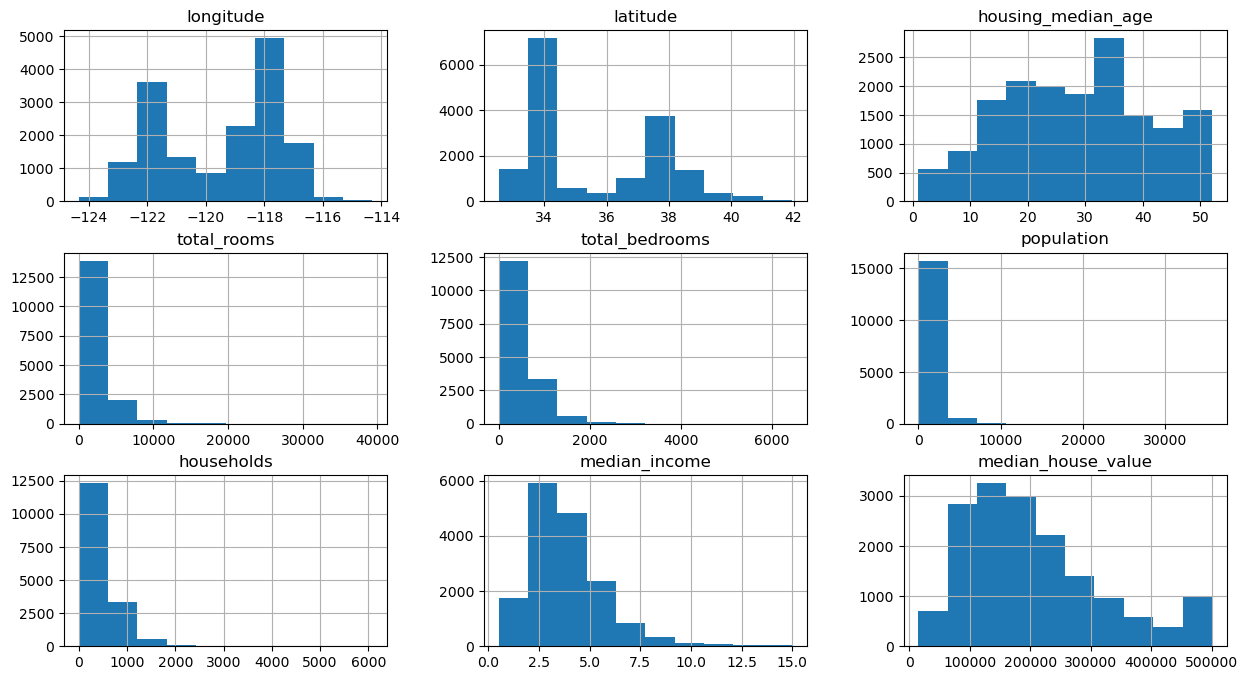

In [223]:
# plot train_data histogram
train_data.hist(figsize=(15,8))

- most of 'housing_median_age' fall between 10 to 40, there are also few are exceptionaly standing at last which mean that it is abpve 50 year.

- households usually less than 2000, but some exception fall between 2000 to 3000 as well.

- latitude most of the houses are between -117 to -119. and longitutde most houses are between 33 to 35.

- median house value some housing price are exceptionally high, and it could be some factors that houses are maybe close to ocean 

- median_income look very much like normalized and in bell-shape curve. most of the people are earning between 20,000 to 40,000 dollars.

- population is 0 to 1500

- the dataset of 26000 instances  consider as median-size data set. so it always good that we can maintain the proportion of all values. stratified sampling.

## Correlation  matrix


In [224]:
# correlation metrix for train data
corr_matrix_train = train_data.corr()
corr_matrix_train["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689626
total_rooms           0.132065
housing_median_age    0.109502
households            0.062297
total_bedrooms        0.046595
population           -0.028067
longitude            -0.044686
latitude             -0.145467
Name: median_house_value, dtype: float64

From above we can observe that median_house_value is independent from population, longitute, latitude, bedroom_ratio and INLAND.
Median_income could be an important factor if we know a person is earning X we get some idea about the kind of houses he can afford. It contribut 68% that happening with the median_house_value.

its always between -1(less correlated) and 1(highly correlated)

<AxesSubplot: >

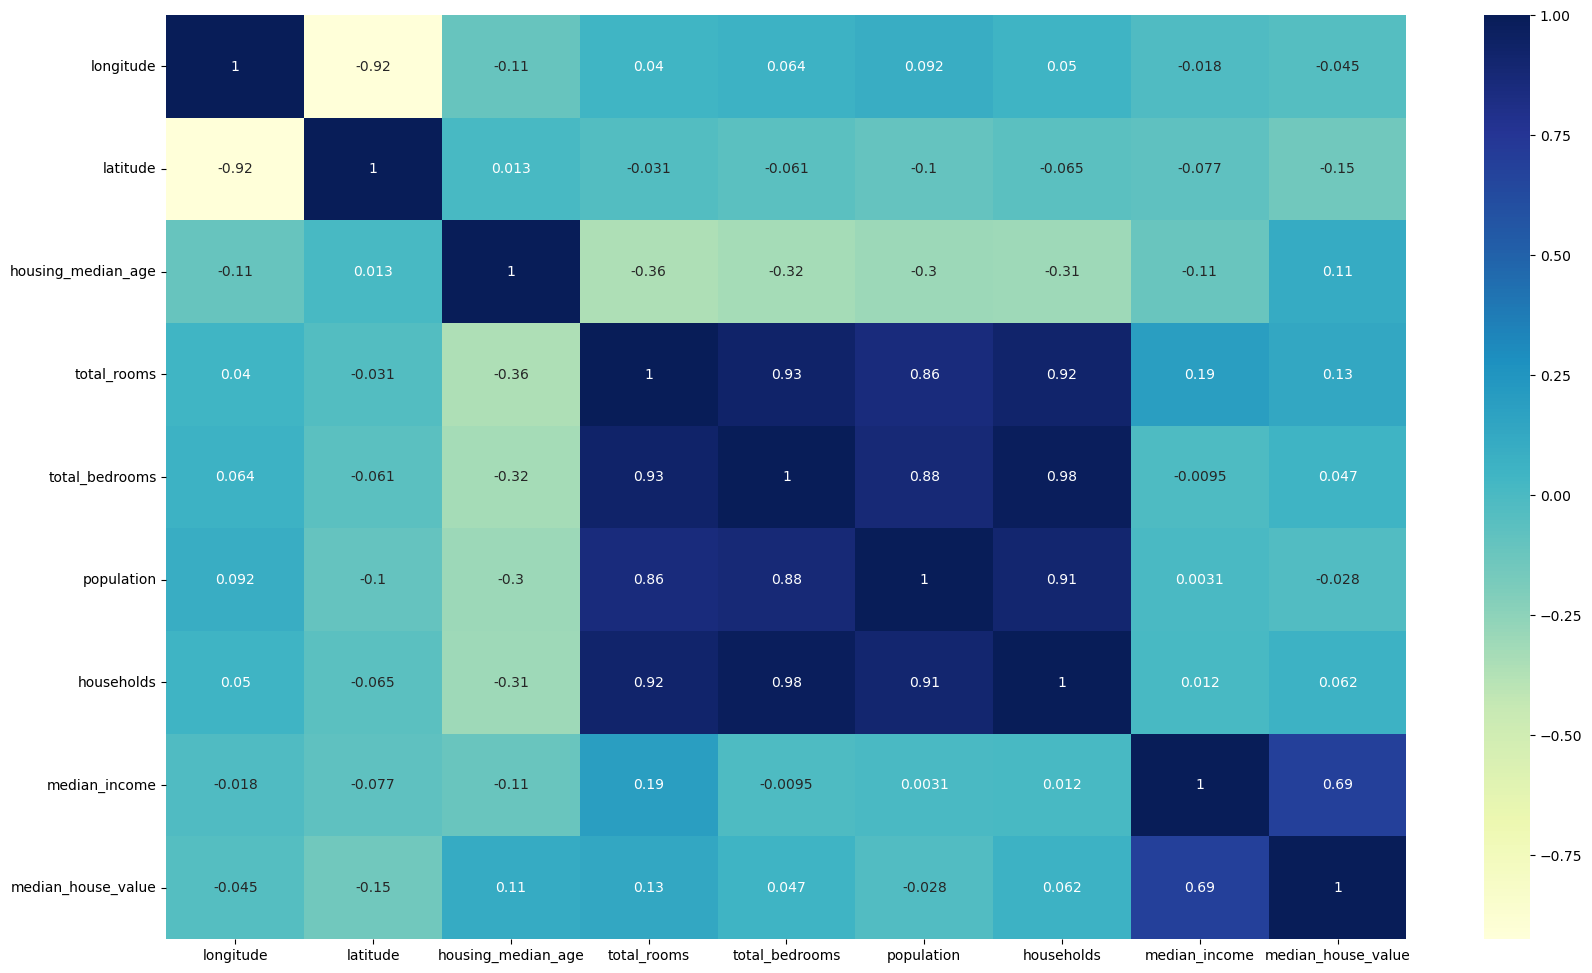

In [225]:
# plot heatmap for train_data.corr
plt.figure(figsize=(20,12))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

Base on corr_matrix["median_house_value"] we can observe that important attributes that use in prediction are ["median_house_value", "median_income", "total_rooms", "housing_median_age"] the rest of the attributes either less correlated or negatively correlated to the median_house_value

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

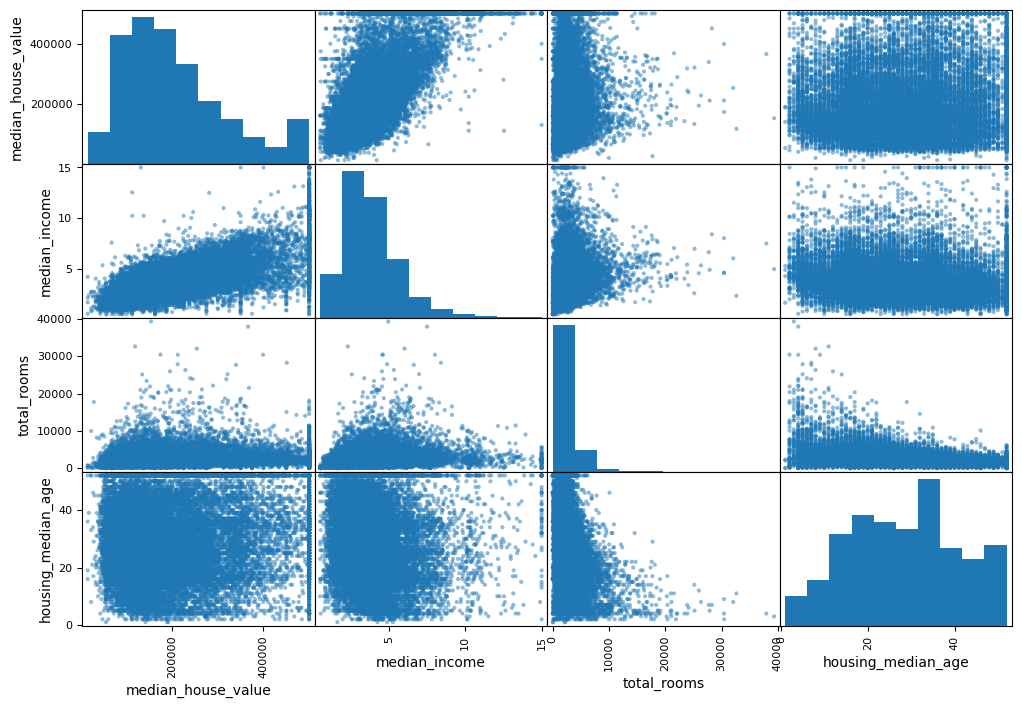

In [226]:
# Select the important attributes to visualize
imp_attributes =["median_house_value", "median_income", "total_rooms", "housing_median_age"]
# Import the scatter_matrix function from pandas' plotting module
from pandas.plotting import scatter_matrix
# Use the scatter_matrix function to visualize the attributes
scatter_matrix(housing[imp_attributes], figsize=(12,8))

(0.0, 16.0, 0.0, 550000.0)

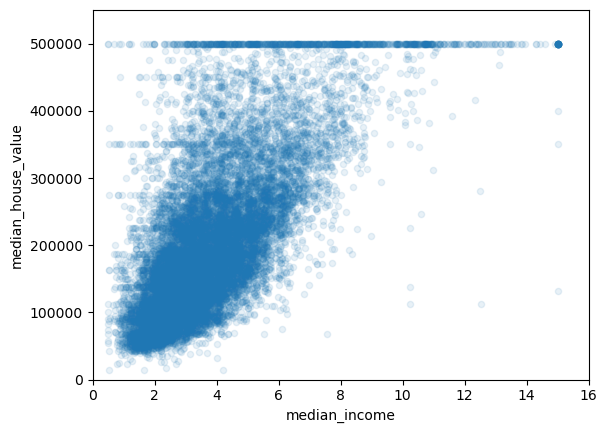

In [227]:
# scattter plot for median_income vs median_house_value
train_data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0,16,0,550000])

From the above scatter matrix plot we can clearly observe that median_income is highly correlated with median_house_value when median_income increases, the median_house_value will also be increased.

In [228]:
train_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000
mean,-119.563605,35.623138,28.684938,2638.395877,538.244953,1424.670562,499.479322,3.873246,207051.228007
std,1.999700,2.132086,12.618572,2184.896793,420.728226,1136.731269,380.965001,1.903355,115641.927401
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1448.000000,295.000000,786.000000,280.000000,2.562500,119800.000000
50%,-118.490000,34.250000,29.000000,2130.000000,435.000000,1168.000000,410.000000,3.536600,179950.000000
75%,-118.010000,37.710000,37.000000,3160.750000,648.000000,1725.000000,606.750000,4.739250,264675.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Preparing the data for ML algos

## 4. Convert/store the dataset locally and preprocess the data
The first step in working with the dataset is to convert and store it locally. The California Housing dataset is available in CSV format, which can be easily loaded and used in most programming languages and tools. Once the dataset is stored locally, the next step is to preprocess the data.

Preprocessing the data is an important step to ensure that it is in a format that can be easily and effectively used for training and evaluating machine learning models. The preprocessing steps for this dataset include:

- Checking for missing values and removing any samples with missing values.
- Converting categorical variables to numerical variables by using one-hot encoding.

These preprocessing steps are needed to ensure that the dataset is in a format that can be effectively used to train and evaluate machine learning models. Missing values can cause problems when training models and can lead to inaccurate predictions. Converting categorical variables to numerical variables allows them to be used in machine learning models and normalizing the numerical variables improves model performance.

The final file type of the dataset after preprocessing will be a CSV file with the same structure and format of the original dataset but with droping of the missing data and the changed datatype of some columns after the one-hot-encoding process. And the final file will also be included the new engineered feactures that will eventually use it for our prediction.

## Encoding categorical data

Occean proximity could be useful in our prediction as if it is closer to the ocean the housing price could be higher than the inland housing price. we couldn't know if this is useful in our prediction in order to use it in our prediction we first need to caonvert it into numerical data first and turn them into binary feacture 0s or 1s.

In [229]:
# Count the number of occurrences of each unique value in the 'ocean_proximity' column
train_data.ocean_proximity.value_counts()

<1H OCEAN     7270
INLAND        5146
NEAR OCEAN    2105
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

In [230]:
# encoding data from categorical to numerical data
# creating new feacture for ocen_proximity eoithor 1 or 0
# drop ocean_proximity column
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)


In [231]:
# train data with all numerical data
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20489,-118.68,34.27,16.0,4637.0,941.0,2476.0,878.0,4.0568,225200.0,1,0,0,0,0
14801,-117.12,32.59,28.0,2793.0,706.0,1825.0,676.0,2.6724,144500.0,0,0,0,0,1
10480,-117.69,33.59,13.0,3320.0,426.0,1432.0,431.0,7.9283,348100.0,1,0,0,0,0
20215,-119.26,34.28,41.0,2822.0,564.0,1288.0,541.0,3.0799,254100.0,0,0,0,0,1
2572,-124.15,40.78,36.0,2112.0,374.0,829.0,368.0,3.3984,90000.0,0,0,0,0,1


In [232]:
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2813,-119.04,35.42,47.0,1691.0,402.0,913.0,358.0,1.8403,54700.0,0,1,0,0,0
10567,-117.74,33.73,18.0,328.0,68.0,391.0,60.0,4.1167,87500.0,1,0,0,0,0
11928,-117.37,33.94,20.0,1682.0,296.0,706.0,291.0,4.0966,140100.0,0,1,0,0,0
16401,-121.23,37.98,27.0,849.0,137.0,373.0,131.0,5.0362,181300.0,0,1,0,0,0
10916,-117.87,33.74,52.0,2411.0,526.0,2165.0,521.0,3.4150,172500.0,1,0,0,0,0


<AxesSubplot: >

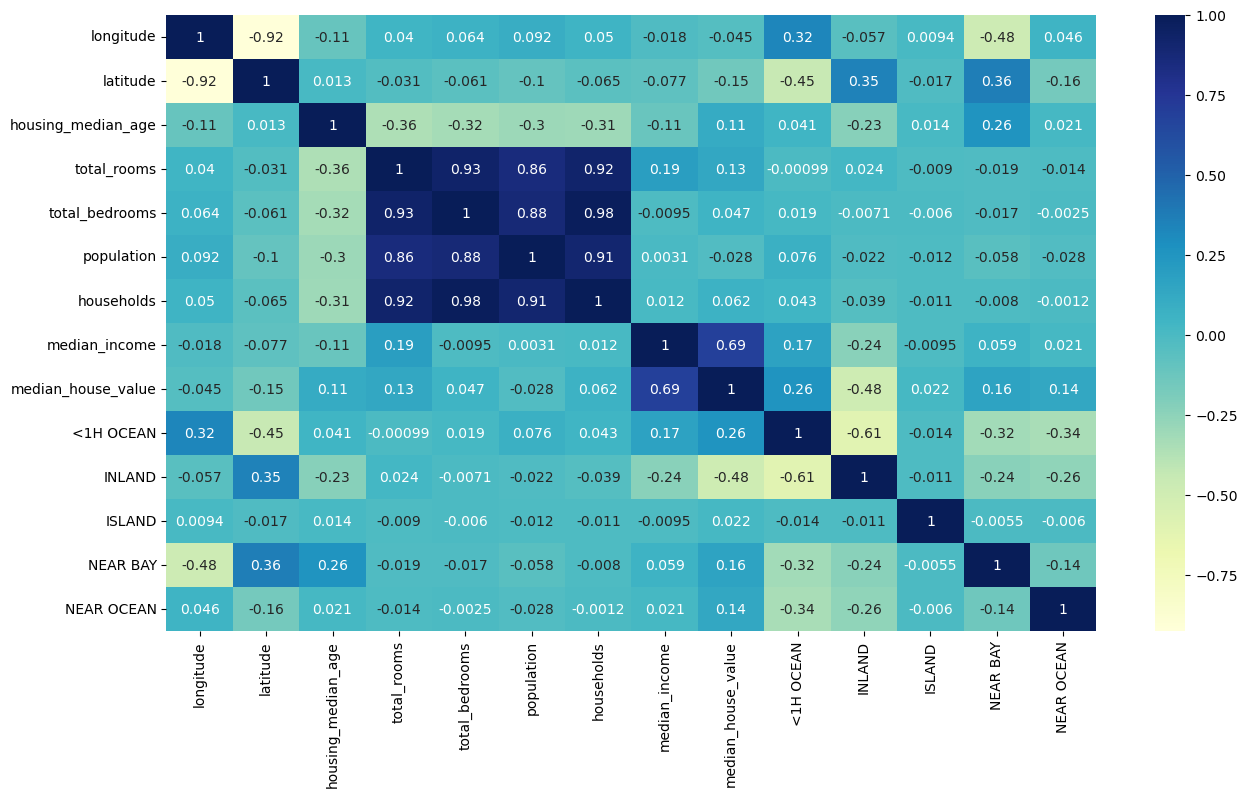

In [233]:
# to see how these new feacture correlate to the target variable
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

Observation: Inland have negative correlationship with the housing value. if it is inland you pay less as compare to the ocean. we can consider now to have a bunch of useful feactures. 1 hour from ocean also have more positive correlation with the housing price.

In [234]:
corr_matrix = train_data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689626
<1H OCEAN             0.257138
NEAR BAY              0.164244
NEAR OCEAN            0.135400
total_rooms           0.132065
housing_median_age    0.109502
households            0.062297
total_bedrooms        0.046595
ISLAND                0.022300
population           -0.028067
longitude            -0.044686
latitude             -0.145467
INLAND               -0.484795
Name: median_house_value, dtype: float64

Observation: From above corr_matrix we can conclude that <1H OCEAN is most positively correlated to median_house_value. Whereas INLAND had negative correlationship with median_house_value which mean that if the house is INLAND, you will be paying less as compare to <1H OCEAN.

## 5. - Measures of central tendency key series

We can use measure of central tendency as a summary measure that attempts to describe our whole set of data with a single value that represents the centre of our distribution. This can be achieved by using pandas library.

In [235]:
import pandas as pd

# Measures of central tendency for median_house_value
mean_median_house_value = housing["median_house_value"].mean()
print("Mean of median_house_value: ", mean_median_house_value)

median_median_house_value = housing["median_house_value"].median()
print("Median of median_house_value: ", median_median_house_value)

mode_median_house_value = housing["median_house_value"].mode()
print("Mode of median_house_value: ", mode_median_house_value)
print("----------------------------------------------------")

# Measures of central tendency for median_income
mean_median_income = housing["median_income"].mean()
print("Mean of median_income: ", mean_median_income)

median_median_income = housing["median_income"].median()
print("Median of median_income: ", median_median_income)

mode_median_income = housing["median_income"].mode()
print("Mode of median_income: ", mode_median_income)
print("----------------------------------------------------")

# Measures of central tendency for total_rooms
mean_total_rooms = housing["total_rooms"].mean()
print("Mean of total_rooms: ", mean_total_rooms)

median_total_rooms = housing["total_rooms"].median()
print("Median of total_rooms: ", median_total_rooms)

mode_total_rooms = housing["total_rooms"].mode()
print("Mode of total_rooms: ", mode_total_rooms)
print("----------------------------------------------------")

# Measures of central tendency for housing_median_age
mean_housing_median_age = housing["housing_median_age"].mean()
print("Mean of housing_median_age: ", mean_housing_median_age)

median_housing_median_age = housing["housing_median_age"].median()
print("Median of housing_median_age: ", median_housing_median_age)

mode_housing_median_age = housing["housing_median_age"].mode()
print("Mode of housing_median_age: ", mode_housing_median_age)


Mean of median_house_value:  206864.41315519012
Median of median_house_value:  179700.0
Mode of median_house_value:  0    500001.0
Name: median_house_value, dtype: float64
----------------------------------------------------
Mean of median_income:  3.8711616013312273
Median of median_income:  3.5365
Mode of median_income:  0    3.125
Name: median_income, dtype: float64
----------------------------------------------------
Mean of total_rooms:  2636.5042333480155
Median of total_rooms:  2127.0
Mode of total_rooms:  0    1527.0
Name: total_rooms, dtype: float64
----------------------------------------------------
Mean of housing_median_age:  28.633093525179856
Median of housing_median_age:  29.0
Mode of housing_median_age:  0    52.0
Name: housing_median_age, dtype: float64


## 5. Measure of spread for key series

While understanding the concepts of Mean, Median and Mode help us to analysts the basic structure of the data set, these are just the measures of central tendency and they don’t provide an overview of the entire data set. Understanding Range, Variance and Standard Deviation help us to understand how spread out our data are from one another.

In [236]:
import pandas as pd

# Range
range_median_house_value = housing["median_house_value"].max() - housing["median_house_value"].min()
print("Range of median_house_value: ", range_median_house_value)

range_median_income = housing["median_income"].max() - housing["median_income"].min()
print("Range of median_income: ", range_median_income)

range_total_rooms = housing["total_rooms"].max() - housing["total_rooms"].min()
print("Range of total_rooms: ", range_total_rooms)

range_housing_median_age = housing["housing_median_age"].max() - housing["housing_median_age"].min()
print("Range of housing_median_age: ", range_housing_median_age)
print("----------------------------------------------------")

# Variance
variance_median_house_value = housing["median_house_value"].var()
print("Variance of median_house_value: ", variance_median_house_value)

variance_median_income = housing["median_income"].var()
print("Variance of median_income: ", variance_median_income)

variance_total_rooms = housing["total_rooms"].var()
print("Variance of total_rooms: ", variance_total_rooms)

variance_housing_median_age = housing["housing_median_age"].var()
print("Variance of housing_median_age: ", variance_housing_median_age)
print("----------------------------------------------------")

# Standard deviation
stddev_median_house_value = housing["median_house_value"].std()
print("Standard deviation of median_house_value: ", stddev_median_house_value)

stddev_median_income = housing["median_income"].std()
print("Standard deviation of median_income: ", stddev_median_income)

stddev_total_rooms = housing["total_rooms"].std()
print("Standard deviation of total_rooms: ", stddev_total_rooms)

stddev_housing_median_age = housing["housing_median_age"].std()
print("Standard deviation of housing_median_age: ", stddev_housing_median_age)

Range of median_house_value:  485002.0
Range of median_income:  14.5002
Range of total_rooms:  39318.0
Range of housing_median_age:  51.0
----------------------------------------------------
Variance of median_house_value:  13325393238.495186
Variance of median_income:  3.6073072496913032
Variance of total_rooms:  4775403.080358456
Variance of housing_median_age:  158.55355824971716
----------------------------------------------------
Standard deviation of median_house_value:  115435.66709858434
Standard deviation of median_income:  1.899291249306252
Standard deviation of total_rooms:  2185.269566977597
Standard deviation of housing_median_age:  12.591805202182773


## 5. Type of distribution for key series

The type of our distribution is positively or right-skewed distribution, is one where the tail on the right side is longer or fatter than the tail on the left side, meaning that the data is concentrated towards the higher values and a smaller number of data points are distributed towards the lower values. The mean is always greater than the median.

In our case, since the mean is greater than the median, this indicates that most of the data points are concentrated towards the high end of the scale and a smaller number of data points are distributed towards the low end of the scale, which is typical of a right-skewed distribution.

## 6. Visualization of dataset using Latitude and Longitude

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

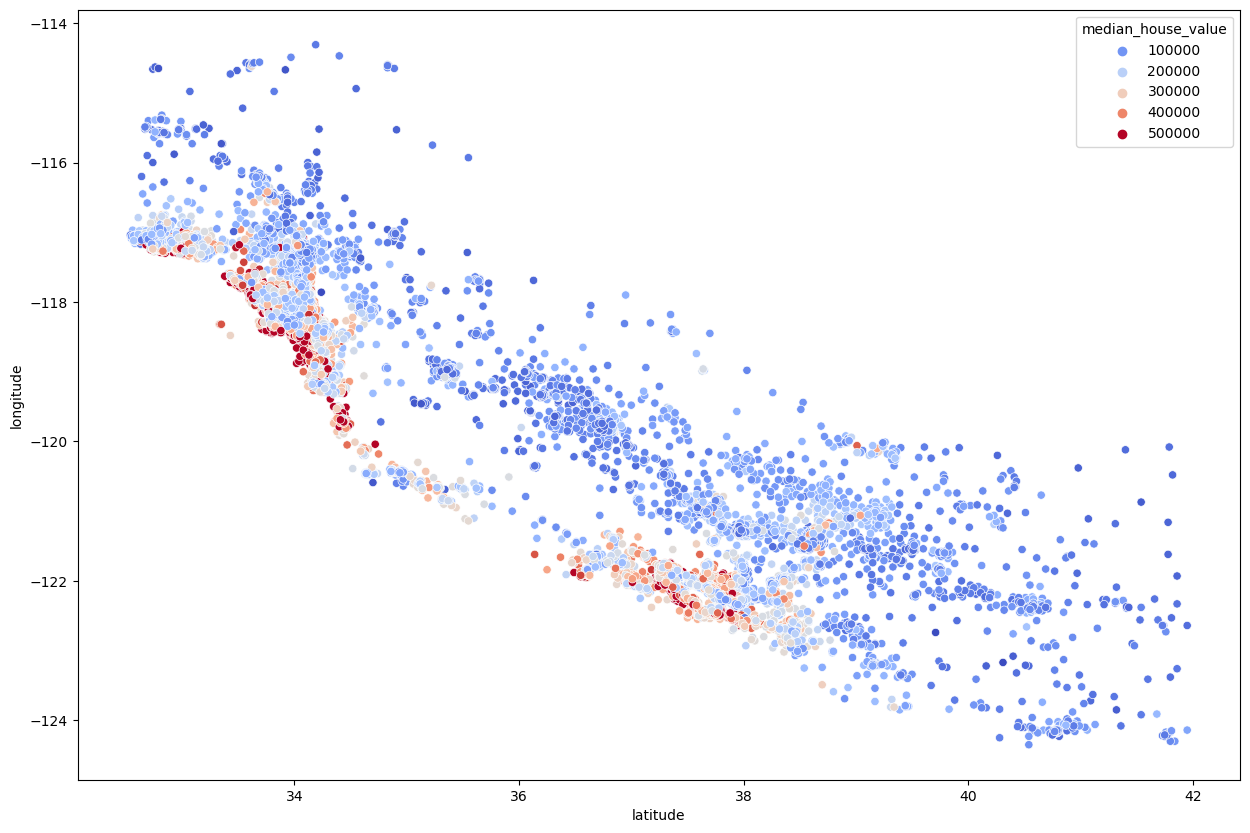

In [237]:
# scatter plot using latitute and longitute vs median_house_value
plt.figure(figsize=(15,10))
sns.scatterplot(x="latitude", y="longitude", data= train_data, hue="median_house_value", palette="coolwarm")

Observation: From the above scatter plot, we can visualize that the more red it get the more it expensive, the more it blue it is the less expensive the houses. base on this graph we can see that all the house that are on coast, close to the ocean or <1H OCEAN are more expensive.

## 7. Feature Engineering
In order to further improve the performance of a model by providing it with more relevant and meaningful input data, we choose total_bedrooms, total_rooms , and population which are both having positive relationship with median_house_value. By performing feature engineering, we can have additional useful features for our regression models. 

In [238]:
# to add additional feature of bedroom_ratio and household_rooms to train_data 
train_data['bedroom_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']
train_data['population_ratio'] = train_data['population']/train_data['households']

# test data
test_data['bedroom_ratio'] = test_data['total_bedrooms']/ test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']
test_data['population_ratio'] = test_data['population']/test_data['households']

In [239]:
# correlation matrix after feacture engineering
corr_matrix_train_fe = train_data.corr()
corr_matrix_train_fe["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689626
<1H OCEAN             0.257138
NEAR BAY              0.164244
household_rooms       0.160946
NEAR OCEAN            0.135400
total_rooms           0.132065
housing_median_age    0.109502
households            0.062297
total_bedrooms        0.046595
ISLAND                0.022300
population_ratio     -0.022058
population           -0.028067
longitude            -0.044686
latitude             -0.145467
bedroom_ratio        -0.266189
INLAND               -0.484795
Name: median_house_value, dtype: float64

Observation: from above, we can observe that household_rooms have more correlation with median_house_value as compare to other feactured attributes. 

<AxesSubplot: >

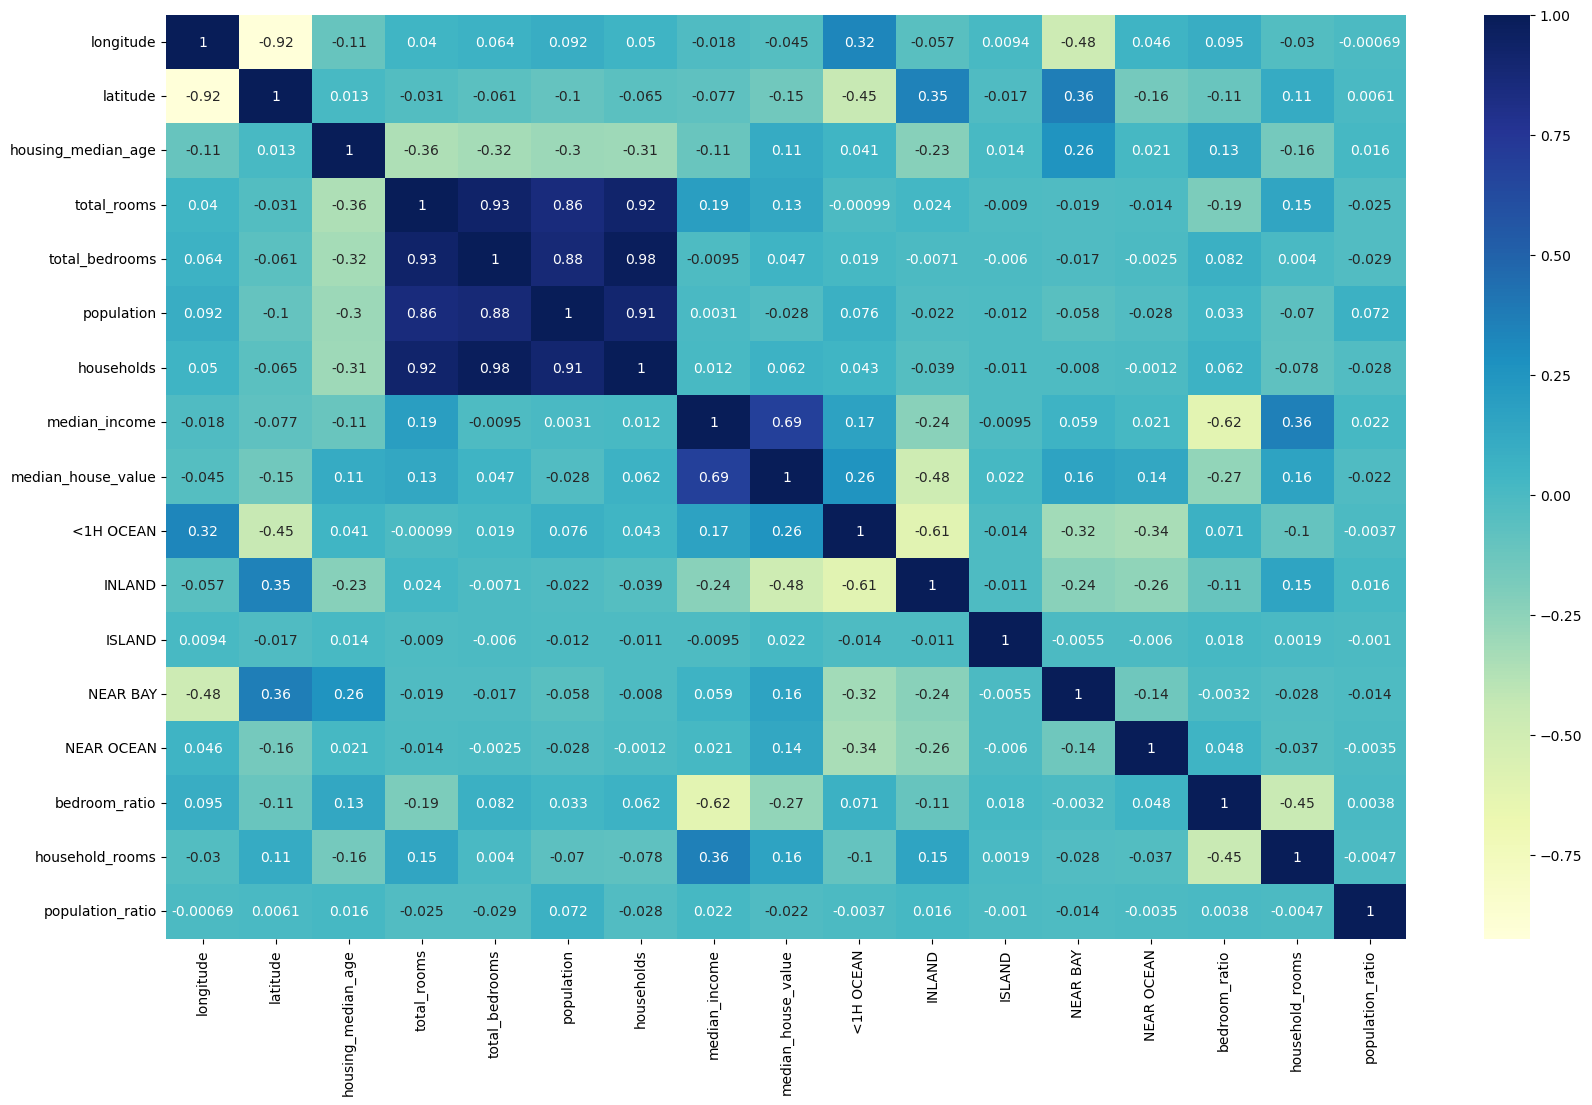

In [240]:
plt.figure(figsize=(20,12))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='population_ratio', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='bedroom_ratio', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='household_rooms', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='population_ratio'>,
        <AxesSubplot: xlabel='population_ratio', ylabel='population_ratio'>,
        <AxesSubplot: xlabel='bedroom_ratio', ylabel='population_ratio'>,
        <AxesSubplot: xlabel='household_rooms', ylabel='population_ratio'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='bedroom_ratio'>,
        <AxesSubplot: xlabel='population_ratio', ylabel='bedroom_ratio'>,
        <AxesSubplot: xlabel='bedroom_ratio', ylabel='bedroom_ratio'>,
        <AxesSubplot: xlabel='household_rooms', ylabel='bedroom_ratio'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='household_rooms'>,
     

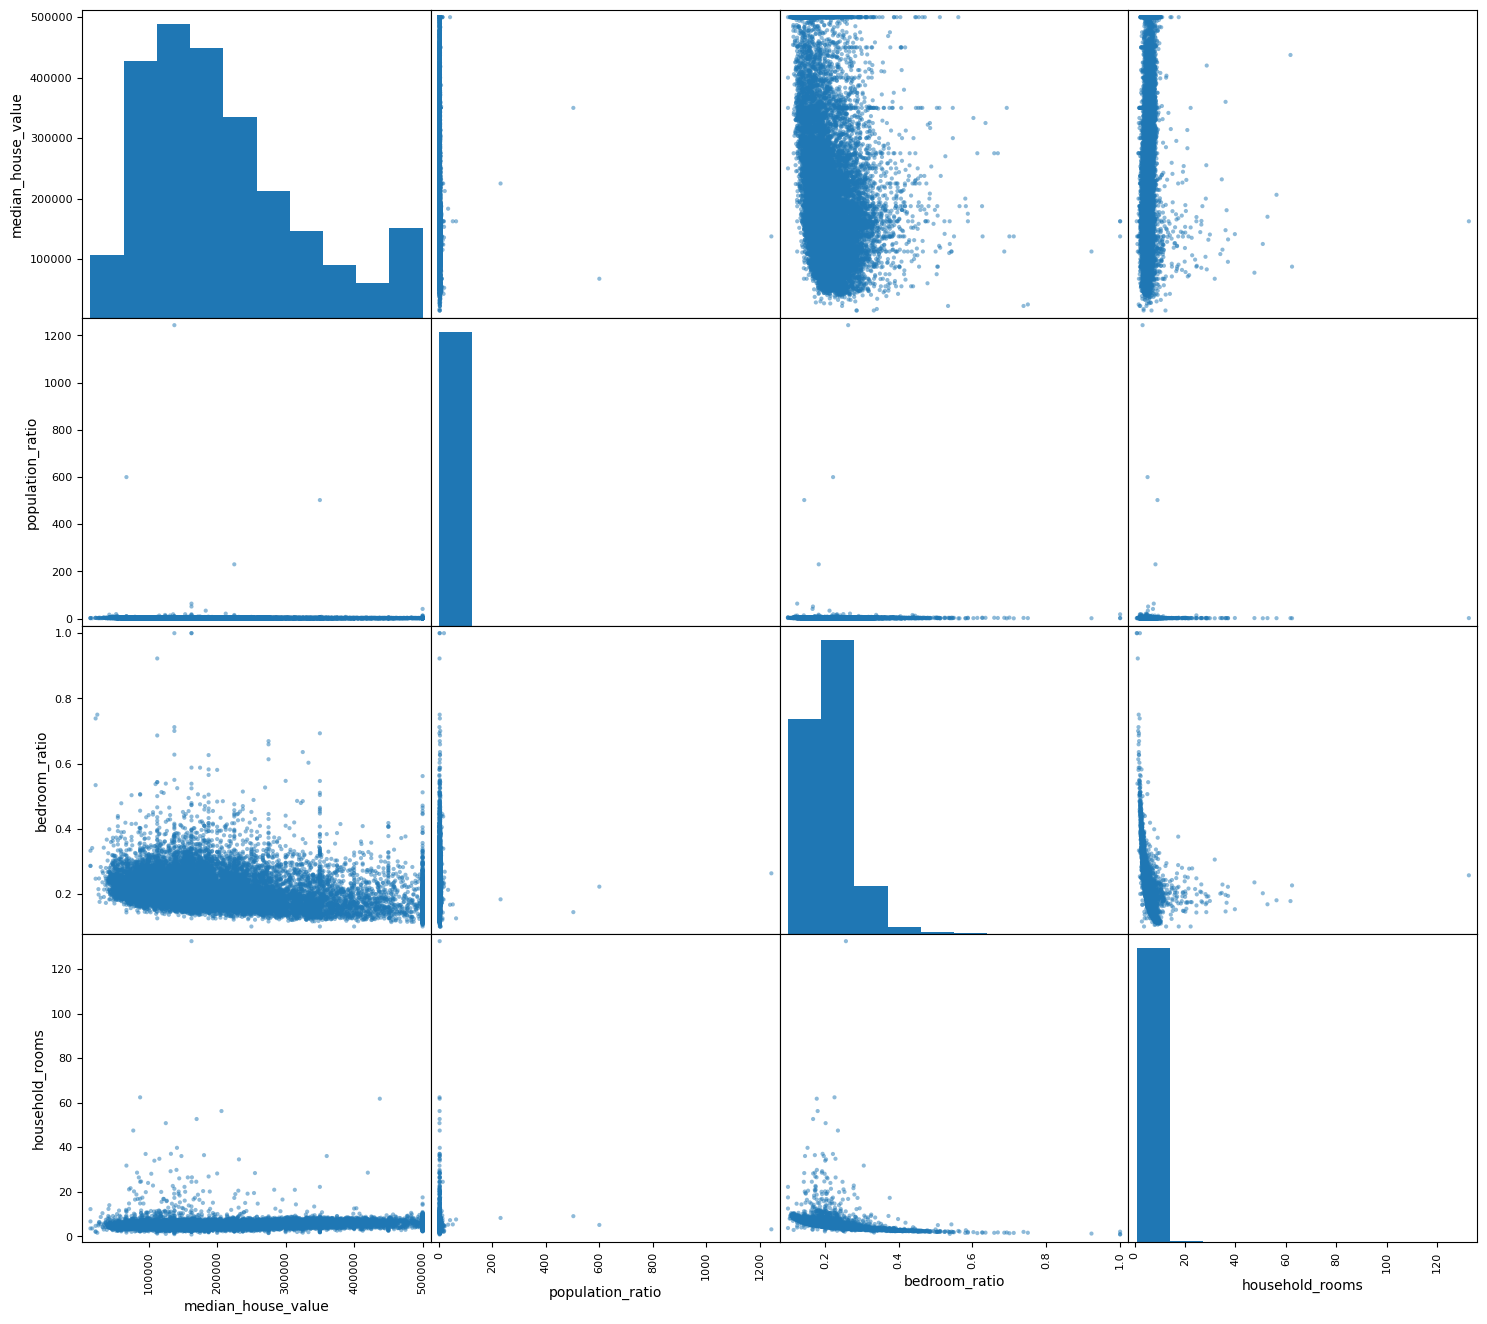

In [241]:
# plot scatter matrix using pandas for feature engineering
featured_attributes =["median_house_value", "population_ratio","bedroom_ratio","household_rooms"]

from pandas.plotting import scatter_matrix

scatter_matrix(train_data[featured_attributes], figsize=(18,16))

Observation: from above, we can observe that household_rooms have positive correlation with median_house_value as compare to other feactured attributes. 

## To test with Linear regression

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_test, y_test= test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)
reg.fit(X_test,y_test)

LinearRegression()

In [243]:
reg.score(X_train, y_train)

0.6519035211059768

In [244]:
reg.score(X_test, y_test)

0.6568059213221538

In [245]:
from sklearn.ensemble import RandomForestRegressor

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
forest = RandomForestRegressor()

forest.fit(X_train, y_train)
forest.fit(X_test, y_test)

RandomForestRegressor()

In [246]:
forest.score(X_train, y_train)

0.7725536598140859

In [247]:
forest.score(X_test, y_test)

0.9670737721371727

Observation: The result of using random forest regression is way better than linear regression method. It it because the features that used to predict the housing price are not linearly related to median_house_value. Therefore, Random Forest Regression model will perform well as compare to Linear Regression model.

## 7. Identify the features and the labels which will be used in the data regression model
We can identify the key series of the California Housing dataset as the median_income, median_house_value, median_house_age, total_bedrooms, total_rooms, population and households. These key attributes will be used as features in the machine learning model.

The label that we are trying to predict is the median_house_value, this will be used as the target variable in the machine learning model. It was selected as the label because it represents the target variable we are trying to predict, which is the housing price.

The importance of these features for the process of building our machine learning model is that they provide information about the different characteristics of the housing market in California. For example, median_income can give us an idea of the level of income of the households in different regions, which can have an impact on the housing prices. Similarly, median_house_age, total_bedrooms, total_rooms, population and households can give us an idea of the characteristics of the housing market, such as the age of the houses, number of bedrooms, number of rooms, population density, and number of households.

To build the regression model, we can use an appropriate Python library such as Scikit-learn, which provides a wide range of machine learning algorithms. In this example, we will only be using Linear and Random Forest Regression as the chosen machine learning approach to predict our housing price. The reason for selecting Random Forest is because it is the method that combines multiple decision trees which might improve the accuracy and stability of the model as compare to linear regression method.

## III. Conclusions
## 9. Use measures such as RMSE to numerically evaluate the performance of the model.

In [248]:
from sklearn.metrics import mean_squared_error
import numpy as np

# predictions
predictions = forest.predict(X_train)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_train, predictions))

print("RMSE for X_train:", rmse)

RMSE for X_train: 55149.49158766821


Observation: The value of "RMSE for X_train: 55283.893408436496" means that on average, our model's predictions for the training set are off by about 55283.89 dollars, which mean that our model is performing very well.

In [249]:
from sklearn.metrics import mean_squared_error
import numpy as np

# predictions
predictions = forest.predict(X_test)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("RMSE for X_test:", rmse)

RMSE for X_test: 20795.57096031171


Observation: The value of "RMSE for X_test: 20368.936319367982" means that on average, our model's predictions for the testing set are off by about 20368.93 dollars, which mean that our model is performing well for our test data too.

## 10. Reflective evaluation
Through this coursework, we were able to have better understanding on  relationships between carious features and housing price, wich can provide useful insights for individuals and organizations intersested in California housing market. The meachine learning models that we developed for this coursework have also provided us with good performance in predicting the housing price. Hence, we can use for our future project in the same field. 

The machine learning model developed in this coursework is transferable to other domain-specific areas that are related to housing market analysis, such as predicting housing price in other states or nations. However our model need to be adapted to other features of the housing market.

Reproducing our project using different programming languages, development environments, ML libraries, and ML algorithms can have both benefits and drawbacks. Some possible benefits include:

- Improved in performance of our project as different ML library may allow us access to more advanced algorithms that can lead us to a better accuracy or faster training time.

- Increased flexibility of our project. Reproducing our model with other tools means that we can use the best tool avaliable for our project which in trun will optimize the performance and increased the reusability of our code.


However, reproducing our project using different tools can also have some drawbacks:

- Increased in complexitity. Reproducing our project using different tools can be more complex and time-consuming than using a single tool. As different programming languages use different syntax and libraries such as python and R.

- Higher cost may required for our project as some of the development environments or ML libraries may require a paid license, which can add to the cost of our project.